<a href="https://colab.research.google.com/github/kadusilva91/Telecom-X-/blob/main/telecomx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tratamento dos dados**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_json('/content/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df = pd.json_normalize(df.to_dict(orient='records'), sep='.')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'cancelou',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'tem_parceiro',
    'customer.Dependents': 'tem_dependentes',
    'customer.tenure': 'tempo_meses',
    'phone.PhoneService': 'tem_telefone',
    'phone.MultipleLines': 'multiplas_linhas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'forma_pagamento',
    'account.Charges.Monthly': 'mensalidade',
    'account.Charges.Total': 'total_gasto'
}, inplace=True)

In [7]:
df['cancelou'].replace('', np.nan, inplace=True)
df.dropna(subset=['cancelou'], inplace=True)

/tmp/ipython-input-7-693678235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cancelou'].replace('', np.nan, inplace=True)


In [8]:
df['idoso'] = df['idoso'].astype(bool)
df['tempo_meses'] = pd.to_numeric(df['tempo_meses'], errors='coerce')
df['mensalidade'] = pd.to_numeric(df['mensalidade'], errors='coerce')
df['total_gasto'] = pd.to_numeric(df['total_gasto'], errors='coerce')

In [9]:
print(f'Total de registros duplicados: {df.duplicated().sum()}')

print('\nFormato do DataFrame:')
print(df.shape)

print('\nTipos de dados:')
print(df.dtypes)

print('\nValores faltantes:')
print(df.isnull().sum())

print('\nValores vazios:')
print((df == '').sum())

Total de registros duplicados: 0

Formato do DataFrame:
(7043, 21)

Tipos de dados:
id_cliente               object
cancelou                 object
genero                   object
idoso                      bool
tem_parceiro             object
tem_dependentes          object
tempo_meses               int64
tem_telefone             object
multiplas_linhas         object
tipo_internet            object
seguranca_online         object
backup_online            object
protecao_dispositivo     object
suporte_tecnico          object
streaming_tv             object
streaming_filmes         object
tipo_contrato            object
fatura_digital           object
forma_pagamento          object
mensalidade             float64
total_gasto             float64
dtype: object

Valores faltantes:
id_cliente               0
cancelou                 0
genero                   0
idoso                    0
tem_parceiro             0
tem_dependentes          0
tempo_meses              0
tem_telefone         

In [10]:
categorical_cols = ['genero', 'tem_parceiro', 'tem_dependentes', 'tem_telefone',
                   'multiplas_linhas', 'tipo_internet', 'seguranca_online',
                   'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
                   'streaming_tv', 'streaming_filmes', 'tipo_contrato',
                   'fatura_digital', 'forma_pagamento', 'cancelou']

print('\nValores únicos em colunas categóricas:')
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Valores únicos em colunas categóricas:
genero: ['Female' 'Male']
tem_parceiro: ['Yes' 'No']
tem_dependentes: ['Yes' 'No']
tem_telefone: ['Yes' 'No']
multiplas_linhas: ['No' 'Yes' 'No phone service']
tipo_internet: ['DSL' 'Fiber optic' 'No']
seguranca_online: ['No' 'Yes' 'No internet service']
backup_online: ['Yes' 'No' 'No internet service']
protecao_dispositivo: ['No' 'Yes' 'No internet service']
suporte_tecnico: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_filmes: ['No' 'Yes' 'No internet service']
tipo_contrato: ['One year' 'Month-to-month' 'Two year']
fatura_digital: ['Yes' 'No']
forma_pagamento: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
cancelou: ['No' 'Yes']


In [11]:
df['contas_diarias'] = df['mensalidade'] / 30
df['contas_diarias'] = df['contas_diarias'].round(2)
print(df[['id_cliente', 'mensalidade', 'contas_diarias']].head())

   id_cliente  mensalidade  contas_diarias
0  0002-ORFBO         65.6            2.19
1  0003-MKNFE         59.9            2.00
2  0004-TLHLJ         73.9            2.46
3  0011-IGKFF         98.0            3.27
4  0013-EXCHZ         83.9            2.80


In [12]:
binarias = [
    'tem_parceiro', 'tem_dependentes', 'tem_telefone',
    'multiplas_linhas', 'seguranca_online', 'backup_online',
    'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
    'streaming_filmes', 'fatura_digital', 'cancelou'
]

for col in binarias:
    df[col] = df[col].astype(str).str.strip().str.lower().map({
        'yes': 1, 'no': 0, 'sim': 1, 'não': 0, 'nan': np.nan
    })

In [17]:
df['tipo_contrato'] = df['tipo_contrato'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Anual (1 ano)',
    'Two year': 'Anual (2 anos)'
})

df['tipo_internet'] = df['tipo_internet'].replace({
    'DSL': 'Internet DSL',
    'Fiber optic': 'Fibra óptica',
    'No': 'Sem internet'
})

In [18]:
print('\nValores únicos por coluna padronizada:')
for col in binarias + ['tipo_contrato', 'tipo_internet']:
    print(f'{col}: {df[col].unique()}')


Valores únicos por coluna padronizada:
tem_parceiro: [1. 0.]
tem_dependentes: [1. 0.]
tem_telefone: [1. 0.]
multiplas_linhas: [ 0.  1. nan]
seguranca_online: [ 0.  1. nan]
backup_online: [ 1.  0. nan]
protecao_dispositivo: [ 0.  1. nan]
suporte_tecnico: [ 1.  0. nan]
streaming_tv: [ 1.  0. nan]
streaming_filmes: [ 0.  1. nan]
fatura_digital: [1. 0.]
cancelou: [0. 1.]
tipo_contrato: ['Anual (1 ano)' 'Mensal' 'Anual (2 anos)']
tipo_internet: ['Internet DSL' 'Fibra óptica' 'Sem internet']


# **Análise dos dados**

In [19]:
df[['tempo_meses', 'mensalidade', 'total_gasto', 'contas_diarias']].describe()

,tempo_meses,mensalidade,total_gasto,contas_diarias
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.158675
std,24.559481,30.090047,2266.771362,1.003088
min,0.000000,18.250000,18.800000,0.610000
25%,9.000000,35.500000,401.450000,1.180000
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.850000,3794.737500,2.990000
max,72.000000,118.750000,8684.800000,3.960000


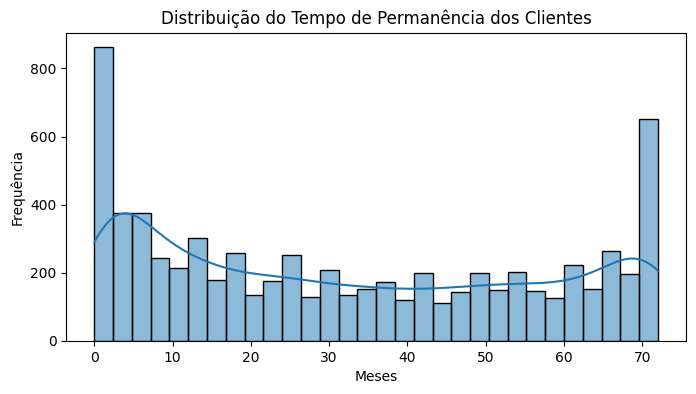

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(df['tempo_meses'], bins=30, kde=True)
plt.title('Distribuição do Tempo de Permanência dos Clientes')
plt.xlabel('Meses')
plt.ylabel('Frequência')
plt.show()

In [21]:
df.groupby('cancelou')[['tempo_meses', 'mensalidade', 'total_gasto', 'contas_diarias']].agg(['mean', 'median', 'std'])


tempo_meses                   mensalidade                     \
                mean median        std        mean  median        std   
cancelou                                                                
0.0        37.569965   38.0  24.113777   61.265124  64.425  31.092648   
1.0        17.979133   10.0  19.531123   74.441332  79.650  24.666053   

          total_gasto                       contas_diarias                   
                 mean   median          std           mean median       std  
cancelou                                                                     
0.0       2555.344141  1683.60  2329.456984        2.04208   2.15  1.036492  
1.0       1531.796094   703.55  1890.822994        2.48145   2.66  0.822287

In [22]:
print("Distribuição por Gênero:")
print(df['genero'].value_counts())

print("\nDistribuição por Tipo de Contrato:")
print(df['tipo_contrato'].value_counts())

print("\nDistribuição por Forma de Pagamento:")
print(df['forma_pagamento'].value_counts())



Distribuição por Gênero:
genero
Male      3555
Female    3488
Name: count, dtype: int64

Distribuição por Tipo de Contrato:
tipo_contrato
Mensal            3875
Anual (2 anos)    1695
Anual (1 ano)     1473
Name: count, dtype: int64

Distribuição por Forma de Pagamento:
forma_pagamento
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [23]:
print(df['cancelou'].value_counts())
print("\nProporção (%):")
print(df['cancelou'].value_counts(normalize=True) * 100)


cancelou
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporção (%):
cancelou
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


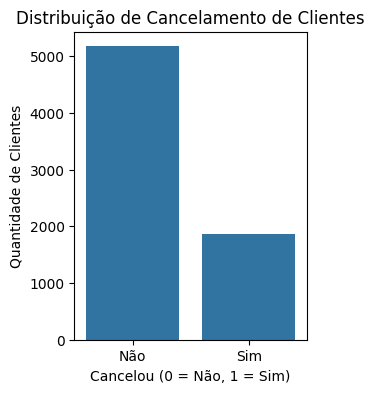

In [27]:
plt.figure(figsize=(3,4))
sns.countplot(x='cancelou', data=df)
plt.title('Distribuição de Cancelamento de Clientes')
plt.xlabel('Cancelou (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()


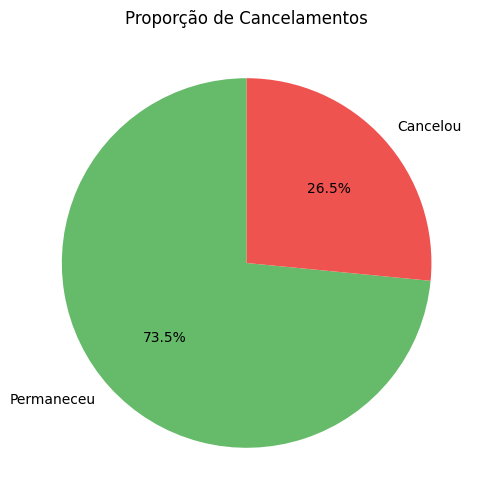

In [39]:
churn_counts = df['cancelou'].value_counts()
labels = ['Permaneceu', 'Cancelou']
colors = ['#66bb6a', '#ef5350']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proporção de Cancelamentos')
plt.savefig('proporcao_cancelamentos.png', dpi=300, bbox_inches='tight')
plt.show()


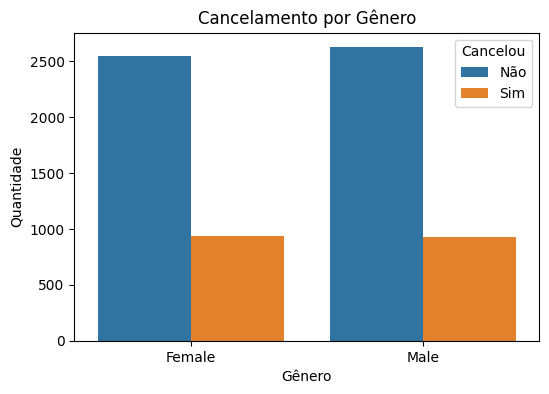

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='genero', hue='cancelou')
plt.title('Cancelamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.show()


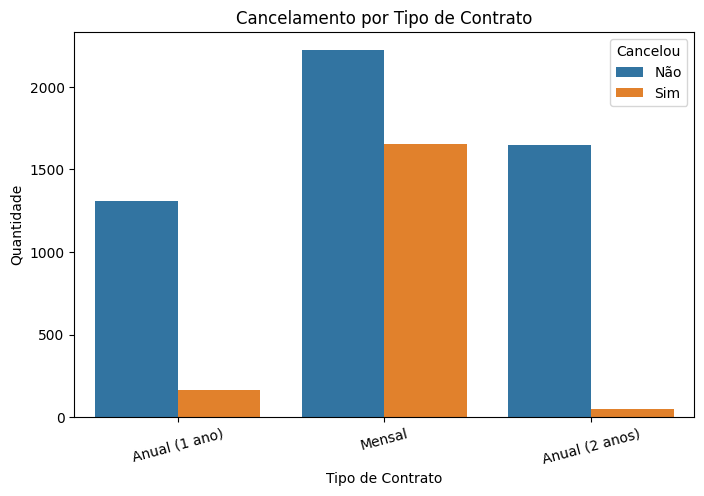

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='tipo_contrato', hue='cancelou')
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.xticks(rotation=15)
plt.savefig('tipo_de_contrato.png', dpi=300, bbox_inches='tight')
plt.show()


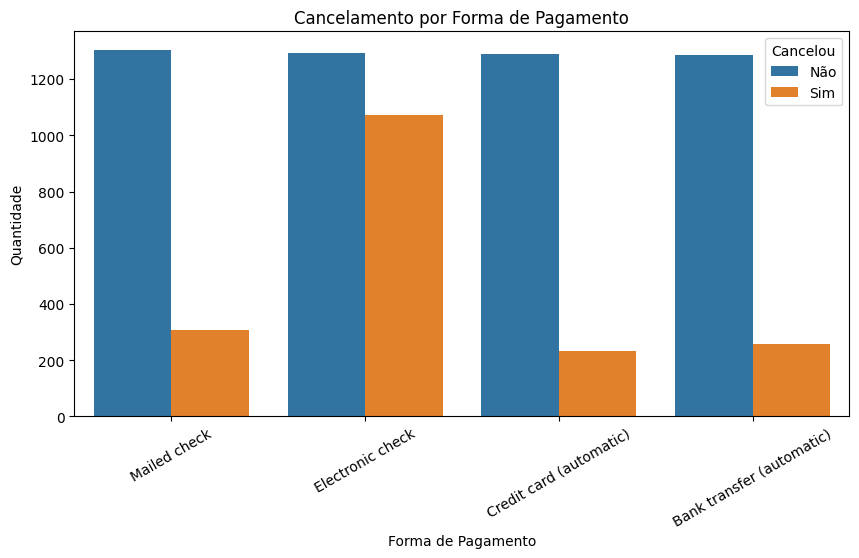

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='forma_pagamento', hue='cancelou')
plt.title('Cancelamento por Forma de Pagamento')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Quantidade')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.xticks(rotation=30)
plt.savefig('forma_pagamento.png', dpi=300, bbox_inches='tight')
plt.show()

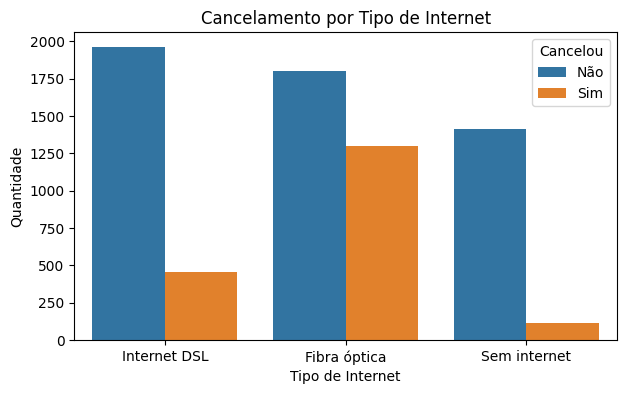

In [48]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='tipo_internet', hue='cancelou')
plt.title('Cancelamento por Tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Quantidade')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.savefig('tipo_internet.png', dpi=300, bbox_inches='tight')
plt.show()


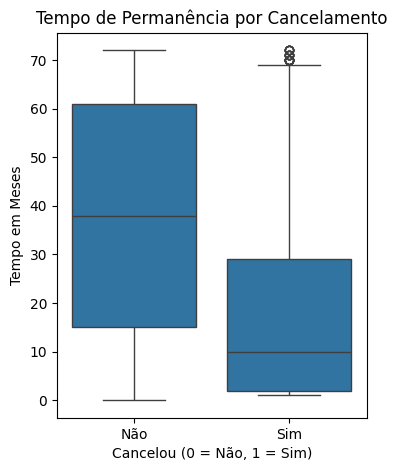

In [50]:
plt.figure(figsize=(4,5))
sns.boxplot(x='cancelou', y='tempo_meses', data=df)
plt.title('Tempo de Permanência por Cancelamento')
plt.xlabel('Cancelou (0 = Não, 1 = Sim)')
plt.ylabel('Tempo em Meses')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.savefig('tempo_permanencia', dpi=300, bbox_inches='tight')
plt.show()

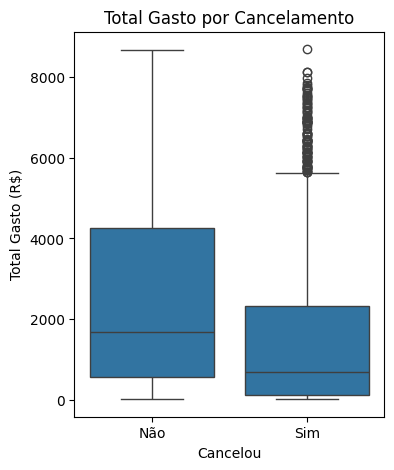

In [51]:
plt.figure(figsize=(4,5))
sns.boxplot(x='cancelou', y='total_gasto', data=df)
plt.title('Total Gasto por Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Total Gasto (R$)')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.savefig('total_gasto_cancelamento.png', dpi=300, bbox_inches='tight')
plt.show()

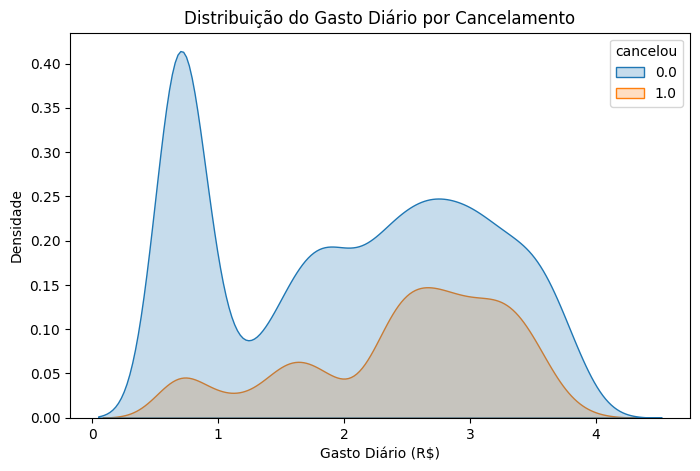

In [52]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='contas_diarias', hue='cancelou', fill=True)
plt.title('Distribuição do Gasto Diário por Cancelamento')
plt.xlabel('Gasto Diário (R$)')
plt.ylabel('Densidade')
plt.savefig('gasto_diaria_cancelamento.png', dpi=300, bbox_inches='tight')
plt.show()


## **📊 Relatório Final — Análise de Evasão de Clientes – Telecom X**

**🧭 Introdução**

A Telecom X está enfrentando um alto índice de evasão de clientes (churn), o que afeta diretamente a receita e a sustentabilidade da empresa. O objetivo deste projeto é analisar o comportamento dos clientes e identificar fatores associados ao cancelamento dos serviços, fornecendo insights estratégicos que auxiliem a equipe de Data Science a desenvolver modelos preditivos e ações de retenção mais eficazes.

**🧹 Limpeza e Tratamento de Dados:**

O processo de limpeza e preparação dos dados envolveu as seguintes etapas:

- Importação de dados a partir de um arquivo .json, com estrutura aninhada.

- Normalização dos dados usando pandas.json_normalize para - transformar campos internos em colunas planas.

- Renomeação de colunas para nomes em português e mais descritivos.

- Tratamento de valores ausentes: foram removidos 224 registros sem informação sobre cancelamento.

- Conversão de tipos de dados, incluindo colunas numéricas (total_gasto, mensalidade, etc.) e booleanas.

- Padronização de respostas textuais (“Sim” / “Não”) para valores binários (1 / 0).

- Criação da coluna derivada contas_diarias, que representa o custo diário estimado com base na mensalidade.

Essas etapas garantiram a consistência e qualidade dos dados, fundamentais para a análise exploratória.

**📈 Análise Exploratória de Dados (EDA)**
📌 Distribuição do Cancelamento
26% dos clientes cancelaram os serviços da empresa.

A proporção é significativa e exige atenção da equipe estratégica.

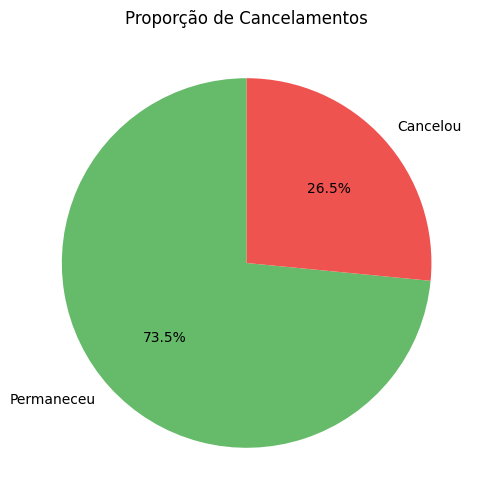

In [43]:
churn_counts = df['cancelou'].value_counts()
labels = ['Permaneceu', 'Cancelou']
colors = ['#66bb6a', '#ef5350']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proporção de Cancelamentos')

plt.show()


**📌 Evasão por variáveis categóricas**

Tipo de contrato tem grande impacto: a maioria dos cancelamentos ocorre em clientes com contrato mensal.

Clientes que utilizam forma de pagamento via débito eletrônico (Electronic Check) também demonstram maior propensão ao churn.

O gênero não apresentou impacto relevante na evasão.

Clientes sem serviços adicionais (como segurança online ou suporte técnico) tendem a cancelar mais.

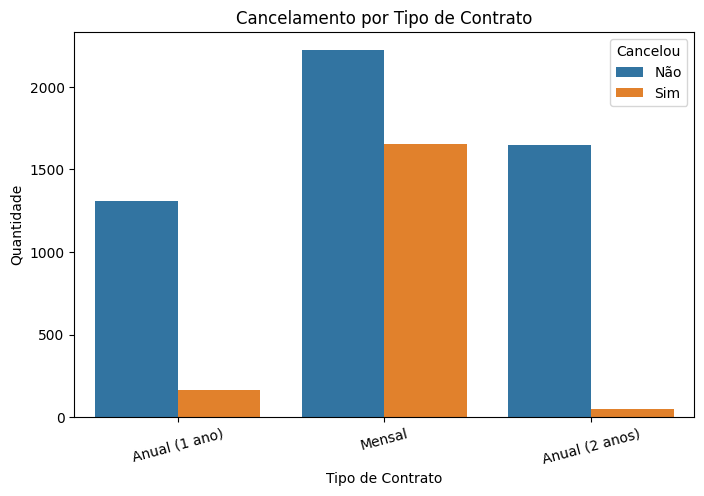

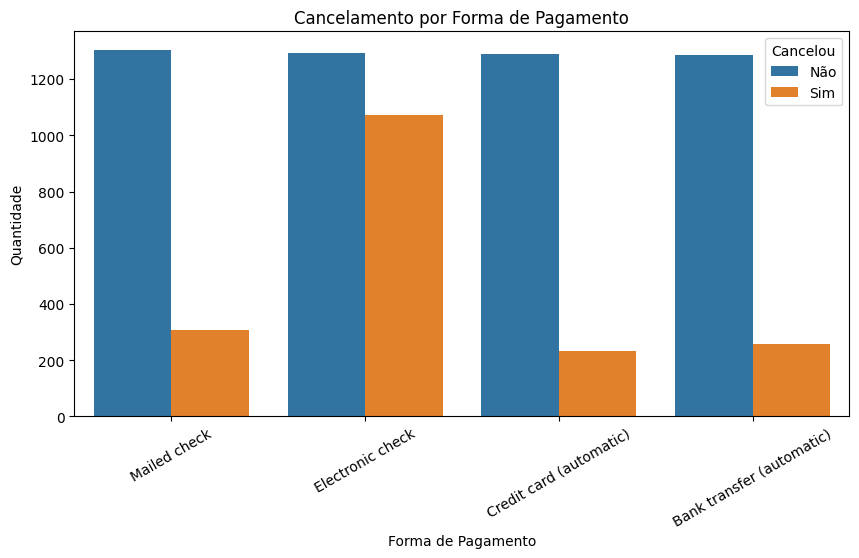

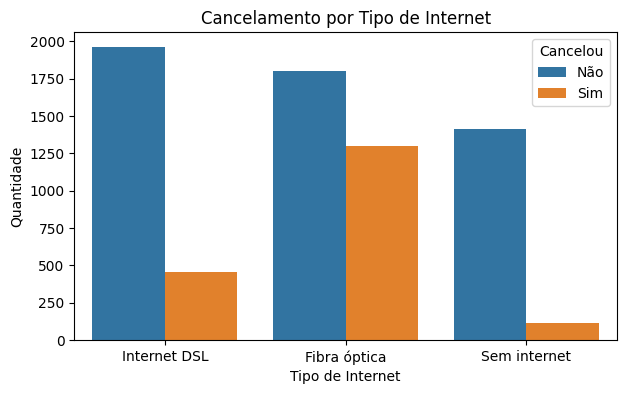

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='tipo_contrato', hue='cancelou')
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.xticks(rotation=15)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='forma_pagamento', hue='cancelou')
plt.title('Cancelamento por Forma de Pagamento')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Quantidade')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.xticks(rotation=30)

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='tipo_internet', hue='cancelou')
plt.title('Cancelamento por Tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Quantidade')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])

plt.show()

**📌 Evasão por variáveis numéricas**

Clientes que cancelam geralmente têm tempo de permanência curto (até 12 meses).

O gasto total de quem cancela é, em média, bem menor do que o de quem permanece — sinal de evasão precoce.

O custo diário (contas_diarias) não demonstrou uma correlação direta, mas valores extremos merecem atenção.

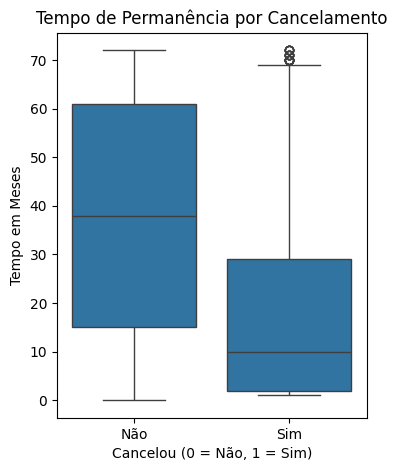

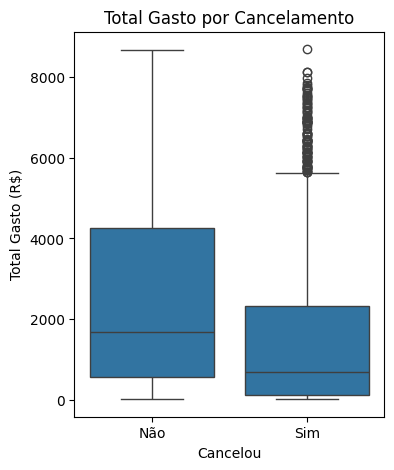

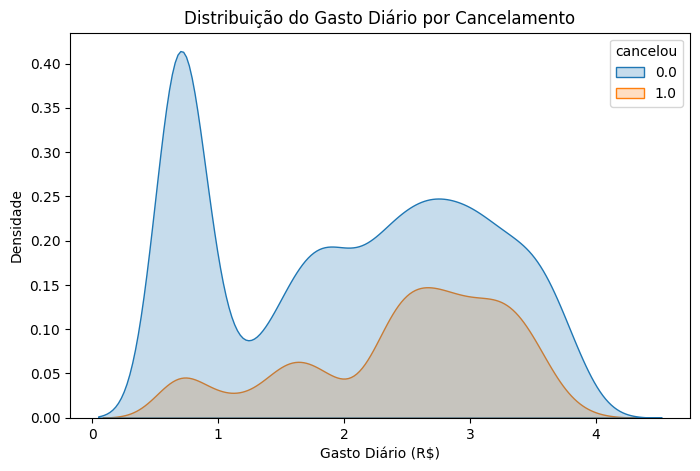

In [53]:
plt.figure(figsize=(4,5))
sns.boxplot(x='cancelou', y='tempo_meses', data=df)
plt.title('Tempo de Permanência por Cancelamento')
plt.xlabel('Cancelou (0 = Não, 1 = Sim)')
plt.ylabel('Tempo em Meses')
plt.xticks([0, 1], ['Não', 'Sim'])

plt.figure(figsize=(4,5))
sns.boxplot(x='cancelou', y='total_gasto', data=df)
plt.title('Total Gasto por Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Total Gasto (R$)')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.savefig('total_gasto_cancelamento.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='contas_diarias', hue='cancelou', fill=True)
plt.title('Distribuição do Gasto Diário por Cancelamento')
plt.xlabel('Gasto Diário (R$)')
plt.ylabel('Densidade')

plt.show()


🧠 **Conclusões e Insights**

A análise revelou que:

A principal causa de churn parece estar ligada a contratos curtos e falta de fidelização.

Clientes com baixo tempo de permanência e baixo total gasto são os que mais abandonam o serviço.

Formas de pagamento manuais ou menos automáticas também estão relacionadas a maior cancelamento.

Serviços adicionais, como suporte técnico e proteção de dispositivo, estão mais presentes em clientes que permanecem.

💡 **Recomendações**

Com base nos achados, a Telecom X pode:

Incentivar planos anuais, oferecendo benefícios para contratos de 1 ou 2 anos.

Oferecer promoções nos primeiros meses para reter o cliente no início da jornada.

Implementar campanhas específicas para usuários de "Electronic Check", incentivando a migração para métodos automáticos.

Oferecer pacotes de valor agregado (segurança online, suporte técnico) com desconto para novos clientes.

